# Project

## **Research Question** - *Would an increase in intra-EU immigration increase unemployment rates within EU countries?*

## ***Estimating the (plausibly) causal effect of immigration on unemployment using panel data with fixed effects***


**Saba Kukutaria**

## Libraries

In [ ]:
library(plm)
library(fixest)
library(car)
library(ggplot2)
library(patchwork)

Loading required package: carData



### Data Repo

https://github.com/SabKa999/Econometrics-Project

## Data

#### The dataset is sourced from Eurostat, covering 27 European Union member countries annually from 2010 to 2024. It is structured as a balanced panel dataset with yearly observations for each country, enabling cross-country and time-series analyses.

#### Key variables include immigration, unemployment rates, public debt, GDP (total and per capita), GDP growth, and inflation.

In [ ]:
# Dataset preview
df <- read.csv('metrics_data_full.csv')
head(df)

,country,year,unemployment,immigrants,int_exp,public_debt,inflation,gdp,gdp_growth,gdp_pc
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Austria,2010,5.532222,NA,3.0,83.7,1.7,294050.6,2.716453,35170
2,Austria,2011,5.555952,NA,2.8,83.4,3.6,308167.0,4.800670,36080
3,Austria,2012,5.608333,43771,2.8,82.9,2.6,316589.4,2.733064,36140
4,Austria,2013,5.638889,465744,2.7,82.4,2.1,321191.7,1.453713,35840
5,Austria,2014,5.632576,59377,2.5,85.2,1.5,330113.5,2.777718,35830
6,Austria,2015,5.591667,5668,2.4,85.6,0.8,342083.5,3.626026,35930


In [ ]:
df <- na.omit(df) # Get rid of rows containing NAs

dim(df) # Data Size

colnames(df) # Columns in data

[1] 300  10

[1] "country"      "year"         "unemployment" "immigrants"   "int_exp"     
 [6] "public_debt"  "inflation"    "gdp"          "gdp_growth"   "gdp_pc"

### Data Description

Variables in the data excluding year/country:   
1) **Unemployment (unemployment)** - *Percentage of population in the labour force*
2) **Immigration (immigrants)** - *Foreign Citizens*
3) **Interest Expenditure (int_exp)** - *Percentage of gross domestic product (GDP)*
4) **Government Debt (public_debt)** - *Percentage of gross domestic product (GDP)*
5) **Inflation (inflation)** - *Annual % change (year-over-year)*
6) **GDP Growth (gdp_growth)** - *Percentage change in gross domestic product (GDP)*
7) **GDP Per Capita (gdp_pc)** - *Real GDP per capita (chain-linked volumes, base year 2010)*
8) **GDP (gdp)** - *Current prices, million euro*

**GDP** will **not** be used in the model. It was used for calculating **GDP Growth**

### Data characteristics

#### A summary table of descriptive statistics

In [ ]:
summary(df)

   country               year       unemployment      immigrants     
 Length:300         Min.   :2010   Min.   : 2.485   Min.   :     67  
 Class :character   1st Qu.:2014   1st Qu.: 5.146   1st Qu.:  13305  
 Mode  :character   Median :2018   Median : 6.192   Median :  57298  
                    Mean   :2017   Mean   : 6.685   Mean   : 309549  
                    3rd Qu.:2021   3rd Qu.: 7.737   3rd Qu.: 218018  
                    Max.   :2024   Max.   :18.134   Max.   :4461394  
    int_exp       public_debt       inflation           gdp         
 Min.   :0.000   Min.   :  8.50   Min.   :-1.600   Min.   :  19163  
 1st Qu.:0.875   1st Qu.: 41.58   1st Qu.: 0.700   1st Qu.:  94669  
 Median :1.400   Median : 60.85   Median : 1.900   Median : 244985  
 Mean   :1.738   Mean   : 68.56   Mean   : 2.646   Mean   : 598347  
 3rd Qu.:2.300   3rd Qu.: 90.92   3rd Qu.: 3.200   3rd Qu.: 550177  
 Max.   :5.100   Max.   :209.40   Max.   :19.400   Max.   :4305260  
   gdp_growth         gdp_p

#### Variable Averages:

In [ ]:
unemployment_mean <- mean(df$unemployment)
immigrants_mean <- mean(df$immigrants)
int_exp_mean <- mean(df$int_exp)
public_debt_mean <- mean(df$public_debt)
gdp_growth_mean <- mean(df$gdp_growth)
inflation_mean <- mean(df$inflation)
gdp_pc_mean <- mean(df$gdp_pc)
cat(' Unemployment:',round(unemployment_mean,2),'\n','Immigartion:',round(immigrants_mean, 2),'\n','Interest Expenditure:',round(int_exp_mean,2),'\n','Public Debt:',round(public_debt_mean,2),'\n','GDP Growth:',round(gdp_growth_mean,2),'\n','Inflation:',round(inflation_mean,2),'\n','GDP Per Capita:',round(gdp_pc_mean,2))

 Unemployment: 6.68 
 Immigartion: 309548.8 
 Interest Expenditure: 1.74 
 Public Debt: 68.56 
 GDP Growth: 4.51 
 Inflation: 2.65 
 GDP Per Capita: 27941.9

### The distribution of the variable ***'immigrants'***

Warning message:
"Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead."
Warning message:
"The dot-dot notation (`..density..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(density)` instead."


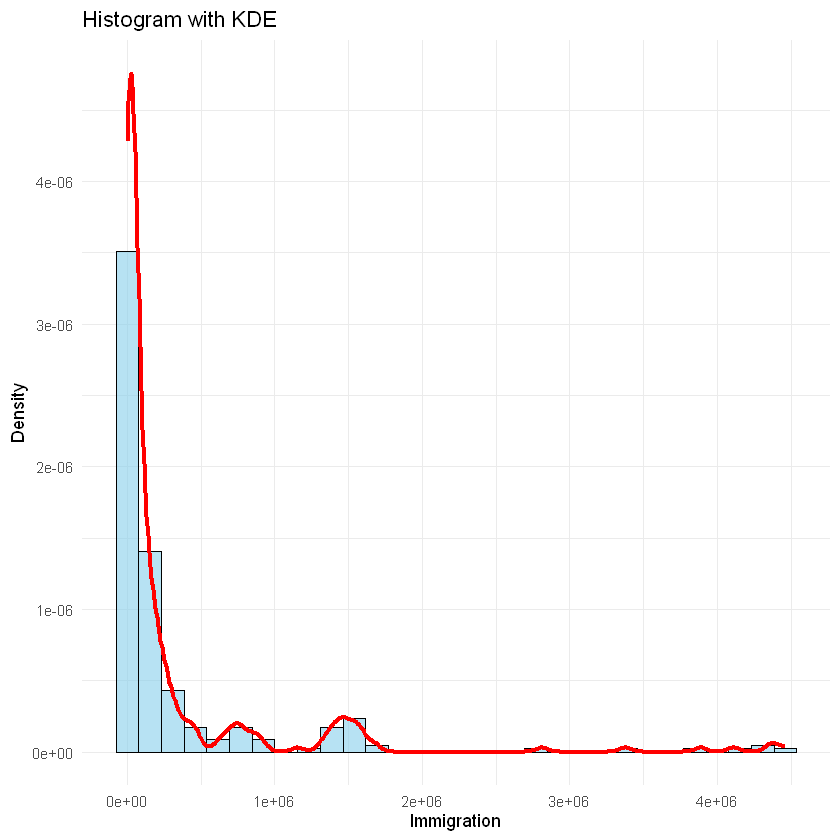

In [ ]:
ggplot(df, aes(x = immigrants)) +
  geom_histogram(aes(y = ..density..), 
                 bins = 30, 
                 fill = "skyblue", 
                 color = "black", 
                 alpha = 0.6) +
  geom_density(color = "red", size = 1.2) +
  labs(title = "Histogram with KDE",
       x = "Immigration",
       y = "Density") +
  theme_minimal()

**Note** that the distribution is severely skewed to the right

## Model Progression

First let's start with a base line model

In [ ]:
model <- lm(unemployment ~ immigrants + int_exp + public_debt + gdp_growth + inflation + gdp_pc, data = df)
summary(model)


Call:
lm(formula = unemployment ~ immigrants + int_exp + public_debt + 
    gdp_growth + inflation + gdp_pc, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.0264 -1.7813 -0.1693  1.2246 11.2485 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  5.391e+00  4.903e-01  10.996   <2e-16 ***
immigrants  -3.940e-07  2.184e-07  -1.804   0.0723 .  
int_exp     -1.923e-01  2.038e-01  -0.943   0.3463    
public_debt  3.879e-02  6.436e-03   6.028    5e-09 ***
gdp_growth  -8.138e-02  3.913e-02  -2.080   0.0384 *  
inflation   -4.483e-02  5.327e-02  -0.842   0.4007    
gdp_pc      -1.517e-05  9.235e-06  -1.642   0.1016    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.476 on 293 degrees of freedom
Multiple R-squared:  0.2569,	Adjusted R-squared:  0.2417 
F-statistic: 16.88 on 6 and 293 DF,  p-value: < 2.2e-16


#### Now we'll use FE(fixed effects) regression to estimate causal effects in our data(panel data) by controlling for entity and time fixed effetcts 

In [ ]:
model <- feols(unemployment ~ immigrants + int_exp + public_debt + gdp_growth + inflation + gdp_pc | country + year, data = df, cluster= ~country)
summary(model)

OLS estimation, Dep. Var.: unemployment
Observations: 300
Fixed-effects: country: 25,  year: 15
Standard-errors: Clustered (country) 
                 Estimate   Std. Error   t value   Pr(>|t|)    
immigrants   7.650000e-09 0.0000000381  0.200940 0.84243869    
int_exp      4.888686e-01 0.2041497942  2.394656 0.02479818 *  
public_debt -4.014677e-02 0.0177959134 -2.255954 0.03346121 *  
gdp_growth  -8.066894e-02 0.0203071003 -3.972450 0.00056488 ***
inflation    7.265238e-02 0.0319364176  2.274907 0.03213355 *  
gdp_pc      -9.688877e-05 0.0000241557 -4.011016 0.00051244 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
RMSE: 0.526183     Adj. R2: 0.959704
                 Within R2: 0.274703

#### In the baseline OLS model, immigration was associated with a reduction in unemployment. However, once country and time  fixed effects are included, the coefficient on immigration becomes positive. This sign reversal suggests that the initial OLS estimates suffered from omitted variable bias. The two-way fixed effects model controls for these unobserved, time-invariant country characteristics and unobserved year-specific shocks that may otherwise bias the results. 

In [ ]:
# Clustered on country
model <- feols(unemployment ~ immigrants + int_exp + public_debt + gdp_growth + inflation + gdp_pc | country + year, data = df, cluster= ~country)
summary(model)

OLS estimation, Dep. Var.: unemployment
Observations: 300
Fixed-effects: country: 25,  year: 15
Standard-errors: Clustered (country) 
                 Estimate   Std. Error   t value   Pr(>|t|)    
immigrants   7.650000e-09 0.0000000381  0.200940 0.84243869    
int_exp      4.888686e-01 0.2041497942  2.394656 0.02479818 *  
public_debt -4.014677e-02 0.0177959134 -2.255954 0.03346121 *  
gdp_growth  -8.066894e-02 0.0203071003 -3.972450 0.00056488 ***
inflation    7.265238e-02 0.0319364176  2.274907 0.03213355 *  
gdp_pc      -9.688877e-05 0.0000241557 -4.011016 0.00051244 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
RMSE: 0.526183     Adj. R2: 0.959704
                 Within R2: 0.274703

In [ ]:
# Clustered on year
model <- feols(unemployment ~ immigrants + int_exp + public_debt + gdp_growth + inflation + gdp_pc | country + year, data = df, cluster= ~year)
summary(model)

OLS estimation, Dep. Var.: unemployment
Observations: 300
Fixed-effects: country: 25,  year: 15
Standard-errors: Clustered (year) 
                 Estimate   Std. Error   t value   Pr(>|t|)    
immigrants   7.650000e-09 0.0000000563  0.135898 8.9384e-01    
int_exp      4.888686e-01 0.1420441068  3.441667 3.9699e-03 ** 
public_debt -4.014677e-02 0.0051097177 -7.856945 1.6885e-06 ***
gdp_growth  -8.066894e-02 0.0178225419 -4.526231 4.7477e-04 ***
inflation    7.265238e-02 0.0151508896  4.795255 2.8510e-04 ***
gdp_pc      -9.688877e-05 0.0000148509 -6.524113 1.3472e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
RMSE: 0.526183     Adj. R2: 0.959704
                 Within R2: 0.274703

In [ ]:
# Clustered two-way country + year
model <- feols(unemployment ~ immigrants + int_exp + public_debt + gdp_growth + inflation + gdp_pc | country + year, data = df, cluster= ~country + ~year)
summary(model)

OLS estimation, Dep. Var.: unemployment
Observations: 300
Fixed-effects: country: 25,  year: 15
Standard-errors: Clustered (country & year) 
                 Estimate   Std. Error   t value   Pr(>|t|)    
immigrants   7.650000e-09 0.0000000268  0.285135 0.77971555    
int_exp      4.888686e-01 0.2237750950  2.184642 0.04641617 *  
public_debt -4.014677e-02 0.0167687521 -2.394142 0.03121713 *  
gdp_growth  -8.066894e-02 0.0220713784 -3.654912 0.00259943 ** 
inflation    7.265238e-02 0.0254909274  2.850127 0.01284670 *  
gdp_pc      -9.688877e-05 0.0000220870 -4.386680 0.00062052 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
RMSE: 0.526183     Adj. R2: 0.959704
                 Within R2: 0.274703

#### Comparing two-way to country clustering, both models (two-way clustering on country and year vs. one-way clustering on country) produce very similar coefficient estimates and overall fit. Standard errors and significance levels are also broadly consistent, though two-way clustering sometimes gives slightly different SEs due to accounting for correlation within years.

#### Because the year cluster count is low (15), one-way clustering on country (25 clusters) is generally more reliable. Despite this, the similar results suggest that inference is reasonably robust under either approach, with a preference for one-way clustering to avoid instability from small cluster sizes.

#### Clustering only on year yields much smaller standard errors and stronger statistical significance for all variables compared to clustering on country. For example, public_debt has a standard error of 0.0051 with year clustering (highly significant at p < 0.001) versus 0.0178 with country clustering (still significant but less so at p ≈ 0.033). Similarly, inflation is highly significant under year clustering (p ≈ 0.0003) but only modestly significant under country clustering (p ≈ 0.033).

#### However, the year cluster count is low (15), which undermines the reliability of these small standard errors and inflated significance levels. Clustering on country, with 25 clusters, produces larger, more conservative standard errors and more cautious significance levels, better reflecting the data’s structure and correlation patterns.

#### Thus, despite stronger apparent significance under year clustering, clustering on country is preferable for more robust and trustworthy inference in this context.

#### One of the most important considerations when clustering standard errors in a panel model is the number of clusters. Standard econometric guidance suggests that each clustering dimension should ideally have more than 30 groups to ensure reliable inference.

#### In our dataset, we have:

* #### 25 countries

* #### 15 years

#### This means that:

* #### The country dimension is closer to the recommended threshold (though still somewhat borderline),

* #### The year dimension, with only 15 clusters, falls well below the threshold.

#### As a result, clustering on year or two-way clustering (country & year) may lead to unstable and biased standard errors, particularly due to negative or underestimated variances, which can distort inference.

#### Given this, we should choose to cluster only on the country dimension, which, although not ideal, provides a more stable and reliable estimate of the standard errors. This approach better captures the likely serial correlation in residuals within countries over time while avoiding the statistical pitfalls of clustering with too few groups.

In [ ]:
model <- feols(unemployment ~ immigrants + int_exp + public_debt + gdp_growth + inflation + gdp_pc| country + year, data = df, cluster= ~country)
summary(model)

OLS estimation, Dep. Var.: unemployment
Observations: 300
Fixed-effects: country: 25,  year: 15
Standard-errors: Clustered (country) 
                 Estimate   Std. Error   t value   Pr(>|t|)    
immigrants   7.650000e-09 0.0000000381  0.200940 0.84243869    
int_exp      4.888686e-01 0.2041497942  2.394656 0.02479818 *  
public_debt -4.014677e-02 0.0177959134 -2.255954 0.03346121 *  
gdp_growth  -8.066894e-02 0.0203071003 -3.972450 0.00056488 ***
inflation    7.265238e-02 0.0319364176  2.274907 0.03213355 *  
gdp_pc      -9.688877e-05 0.0000241557 -4.011016 0.00051244 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
RMSE: 0.526183     Adj. R2: 0.959704
                 Within R2: 0.274703

#### Looking at the Immigration distribution graph we can tell that Immigration is severly skewed right. This observation gives us the opportunity to use **Loggarithmic Transformation**.
#### We will **log immigrants** variable to reduce the skewness. It compresses large outliers, spreads out smaller values making the distribution more symmetric and closer to normal

In [ ]:
df$immigrants_log <- log(df$immigrants)
model <- feols(unemployment ~ immigrants_log + int_exp + public_debt + gdp_growth + inflation + gdp_pc| country + year, data = df, cluster= ~country)
summary(model)

OLS estimation, Dep. Var.: unemployment
Observations: 300
Fixed-effects: country: 25,  year: 15
Standard-errors: Clustered (country) 
                Estimate Std. Error  t value   Pr(>|t|)    
immigrants_log  0.025037   0.014768  1.69542 0.10293210    
int_exp         0.484596   0.204208  2.37305 0.02599579 *  
public_debt    -0.039989   0.017791 -2.24770 0.03405487 *  
gdp_growth     -0.081550   0.020382 -4.00098 0.00052561 ***
inflation       0.072617   0.032212  2.25436 0.03357504 *  
gdp_pc         -0.000097   0.000024 -4.03661 0.00048033 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
RMSE: 0.525229     Adj. R2: 0.95985 
                 Within R2: 0.277332

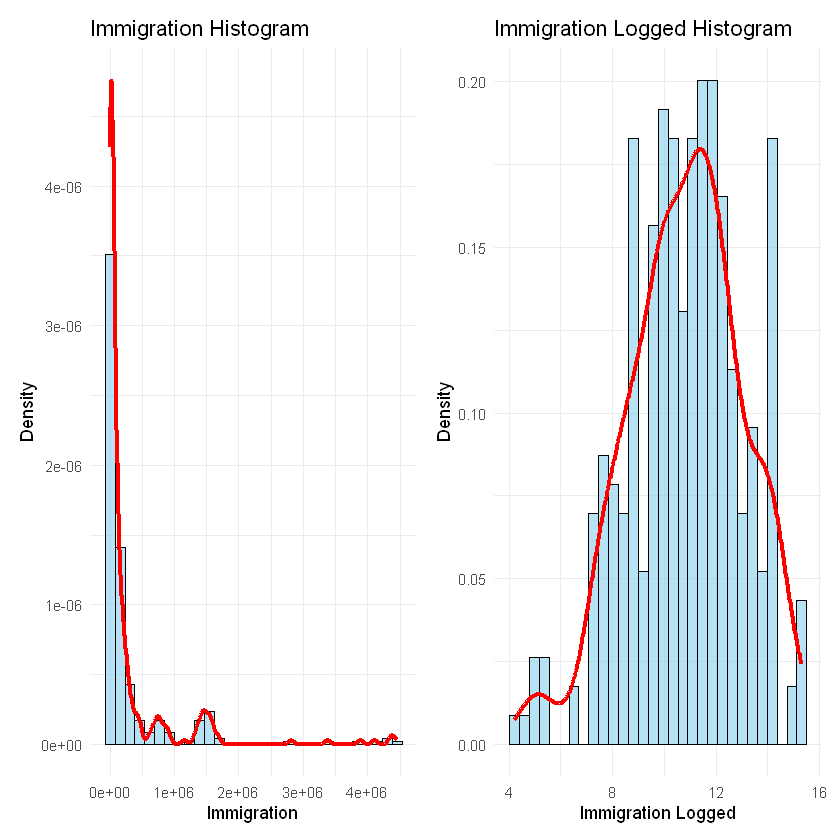

In [ ]:
p1 <- ggplot(df, aes(x = immigrants)) +
  geom_histogram(aes(y = ..density..), 
                 bins = 30, 
                 fill = "skyblue", 
                 color = "black", 
                 alpha = 0.6) +
  geom_density(color = "red", size = 1.2) +
  labs(title = "Immigration Histogram",
       x = "Immigration",
       y = "Density") +
  theme_minimal()

p2 <- ggplot(df, aes(x = immigrants_log)) +
  geom_histogram(aes(y = ..density..), 
                 bins = 30, 
                 fill = "skyblue", 
                 color = "black", 
                 alpha = 0.6) +
  geom_density(color = "red", size = 1.2) +
  labs(title = "Immigration Logged Histogram",
       x = "Immigration Logged",
       y = "Density") +
  theme_minimal()

p1 + p2


#### As you can see, the **Loggarithmic Transormation** made the distribution of immigration more symmetric closer to normal distribution.

#### From this point, we propose two strategies to improve our model: **Instrumental Variables (IV)** and the inclusion of **Interaction Terms**. First, we assess whether immigrants_log is exogenous by applying the Durbin-Wu-Hausman (DWH) test, alongside the first-stage F-statistic to evaluate instrument strength.

#### As a potential instrument, we use the **2-year lagged value** of immigrants_log. Lagging shifts the immigration data by two years for each country. For example, the immigration level in 2010 becomes the instrument for 2012. This approach assumes that past immigration affects current immigration (relevance) but is not directly related to current unemployment (exclusion restriction), making it a candidate instrument under standard IV assumptions.

In [ ]:
feiv_model <- feols(unemployment ~ int_exp + public_debt + gdp_growth + inflation + gdp_pc | country + year | immigrants_log ~ l(immigrants_log, 2), data = df, panel.id = ~country + year, clsuter=~country)
summary(feiv_model)

Warning message:
"In fixest_env(fml = fml, data = data, weights = weig...:
 feols(fml = une...: clsuter is not a valid argument for function feols()"
NOTE: 55 observations removed because of NA values (IV: 0/55).



TSLS estimation - Dep. Var.: unemployment
                  Endo.    : immigrants_log
                  Instr.   : l(immigrants_log, 2)
Second stage: Dep. Var.: unemployment
Observations: 245
Fixed-effects: country: 24,  year: 13
Standard-errors: Clustered (country) 
                    Estimate Std. Error  t value Pr(>|t|)    
fit_immigrants_log  0.230561   0.202343  1.13946 0.266242    
int_exp             0.556799   0.230394  2.41672 0.023997 *  
public_debt        -0.024456   0.017414 -1.40441 0.173559    
gdp_growth         -0.069574   0.030271 -2.29842 0.030964 *  
inflation           0.055122   0.032237  1.70986 0.100750    
gdp_pc             -0.000072   0.000030 -2.36046 0.027107 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
RMSE: 0.529951     Adj. R2:  0.953983
                 Within R2: -0.03053 
F-test (1st stage), immigrants_log: stat = 3.37261, p = 0.067602, on 1 and 226 DoF.
                        Wu-Hausman: stat = 1.00795, p = 0.316596, on 1 

#### In theory, immigration may be endogenous to unemployment if migrants respond to labor market conditions. To test for endogeneity, we estimated a two-stage least squares (2SLS) model using a 2-year lag of immigrants_log as an instrument. However, the instrument appears weak, with a first-stage F-statistic of 3.37, well below the conventional threshold of 10, suggesting limited explanatory power. Despite this, the Durbin-Wu-Hausman (DWH) test yielded a p-value of 0.316, meaning we cannot reject the null hypothesis that immigrants_log is exogenous.

#### While the DWH result may seem to support exogeneity, it is important to note that weak instruments tend to bias the DWH p-value upward, making it less likely to detect endogeneity even if it exists. Given this, and the difficulty in identifying a strong and valid instrument for intra-EU migration, we proceed under the assumption that immigration is exogenous.

#### From here we can try adding **Interaction Terms** to capture **conditional relationships**. They model real-world economic complexity, where effects depend on context and group characteristics.

#### For the first **interaction term** we will be uisng **immigration(logged)** with **government debt**. This will describe how the impact of immigration depends on government debt

In [ ]:
model <- feols(unemployment ~ immigrants_log + int_exp + public_debt + I(immigrants_log*public_debt) + gdp_growth + inflation + gdp_pc | country + year, data = df, cluster= ~country)
summary(model)

OLS estimation, Dep. Var.: unemployment
Observations: 300
Fixed-effects: country: 25,  year: 15
Standard-errors: Clustered (country) 
                                 Estimate Std. Error  t value   Pr(>|t|)    
immigrants_log                   0.113963   0.041884  2.72091 0.01192043 *  
int_exp                          0.477555   0.202188  2.36193 0.02663264 *  
public_debt                     -0.025221   0.019500 -1.29338 0.20818957    
I(immigrants_log * public_debt) -0.001258   0.000549 -2.28923 0.03116219 *  
gdp_growth                      -0.081017   0.019756 -4.10096 0.00040814 ***
inflation                        0.067521   0.032753  2.06150 0.05024603 .  
gdp_pc                          -0.000098   0.000024 -4.14979 0.00036063 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
RMSE: 0.521975     Adj. R2: 0.96019 
                 Within R2: 0.286258

#### Before drawing any conclusions we should first look at **Variance Inflation Factors(VIFs)**. VIF will tell us if there is any multicollinearity between regressors. This is important here as we added an interaction term

In [ ]:
fe_mod <- plm(unemployment ~ immigrants_log + int_exp + public_debt+ I(immigrants_log * public_debt) + gdp_growth + inflation + gdp_pc,
              data = df,
              index = "country",
              model = "within")

X <- model.matrix(fe_mod)
X_df <- as.data.frame(X)
X_df$unemployment <- df$unemployment
lm_dummy <- lm(unemployment ~ ., data = X_df)
vifs <- vif(lm_dummy)
print(round(vifs, 3))

                   immigrants_log                           int_exp 
                            4.763                             1.458 
                      public_debt `I(immigrants_log * public_debt)` 
                            4.921                             8.827 
                       gdp_growth                         inflation 
                            1.494                             1.454 
                           gdp_pc 
                            1.712 


#### As you can see the VIFs of **immigrants_log**, **public_debt** and their interaction term are elevated. To solve this we can us **mean-centering/centering**. Mean-centering centers the variable around it's mean which looks like this:  

#### $X_{centered}$ = $X$ - $\bar{X}$

#### Mean-centering gets rid of the shared linear trend which as a result, decreases multicollinearity

#### We also need to state that centering changes the interpretation of the coefficients. Since the variables are centered, any raw input values must undergo the same centering transformation before being used in the model. This means the transformed values are relative to the variable's mean.

#### For example, the coefficient for public_debt is -0.025, and public_debt has been centered. A raw input value $X$ must be transformed by subtracting the mean of public_debt before applying the coefficient. After this transformation, the value can be positive or negative depending on whether the raw input is above or below the average public_debt.

#### Don’t let this change in interpretation mislead you: the model’s overall fit and predictions remain unchanged by centering.



In [ ]:
# Centering both regressors
df$immigrants_log_centered <- df$immigrants_log - mean(df$immigrants_log, na.rm = TRUE)
df$public_debt_centered <- df$public_debt - public_debt_mean

In [ ]:
model <- feols(unemployment ~ immigrants_log_centered + int_exp + public_debt_centered + I(immigrants_log_centered * public_debt_centered) + gdp_growth + inflation + gdp_pc | country + year, data = df, cluster= ~country)
summary(model)

OLS estimation, Dep. Var.: unemployment
Observations: 300
Fixed-effects: country: 25,  year: 15
Standard-errors: Clustered (country) 
                                                   Estimate Std. Error  t value
immigrants_log_centered                            0.027747   0.014281  1.94290
int_exp                                            0.477555   0.202188  2.36193
public_debt_centered                              -0.038810   0.017535 -2.21329
I(immigrants_log_centered * public_debt_centered) -0.001258   0.000549 -2.28923
gdp_growth                                        -0.081017   0.019756 -4.10096
inflation                                          0.067521   0.032753  2.06150
gdp_pc                                            -0.000098   0.000024 -4.14979
                                                    Pr(>|t|)    
immigrants_log_centered                           0.06384903 .  
int_exp                                           0.02663264 *  
public_debt_centered           

In [ ]:
fe_mod <- plm(unemployment ~ immigrants_log_centered + int_exp + public_debt_centered + I(immigrants_log_centered * public_debt_centered) + gdp_growth + inflation + gdp_pc,
              data = df,
              index = "country",
              model = "within")

X <- model.matrix(fe_mod)
X_df <- as.data.frame(X)
X_df$unemployment <- df$unemployment
lm_dummy <- lm(unemployment ~ ., data = X_df)
vifs <- vif(lm_dummy)
print(round(vifs, 3))

                            immigrants_log_centered 
                                              1.024 
                                            int_exp 
                                              1.458 
                               public_debt_centered 
                                              1.288 
`I(immigrants_log_centered * public_debt_centered)` 
                                              1.018 
                                         gdp_growth 
                                              1.494 
                                          inflation 
                                              1.454 
                                             gdp_pc 
                                              1.712 


#### As you can see the VIFs are now way lower and acceptable. This means that centering really did take care of the multicollinearity problem.

#### Let's add another interaction term between **Immigration(logged)** and **GDP Per Capita**. The impact of immigration might depend on a country's income level. This interaction term allows the model to reflect that in richer countries, immigration may be more beneficial than in poorer ones

In [ ]:
df$int_exp_centered <- df$int_exp - int_exp_mean
df$gdp_pc_centered <- df$gdp_pc - gdp_pc_mean

In [ ]:
model_final <- feols(unemployment ~ immigrants_log_centered + int_exp + public_debt_centered + I(immigrants_log_centered*gdp_pc_centered) + I(immigrants_log_centered * public_debt_centered) + gdp_growth + inflation + gdp_pc_centered | country + year, data = df, cluster= ~country)
summary(model_final)

OLS estimation, Dep. Var.: unemployment
Observations: 300
Fixed-effects: country: 25,  year: 15
Standard-errors: Clustered (country) 
                                                     Estimate Std. Error
immigrants_log_centered                            0.02643494 0.01481655
int_exp                                            0.47929012 0.20152446
public_debt_centered                              -0.03845231 0.01769484
I(immigrants_log_centered * gdp_pc_centered)       0.00000121 0.00000112
I(immigrants_log_centered * public_debt_centered) -0.00126592 0.00055976
gdp_growth                                        -0.08068175 0.01993828
inflation                                          0.06873863 0.03227991
gdp_pc_centered                                   -0.00009966 0.00002297
                                                   t value   Pr(>|t|)    
immigrants_log_centered                            1.78415 0.08704929 .  
int_exp                                            2.37832 0.

In [ ]:
fe_mod <- plm(unemployment ~ immigrants_log_centered + int_exp + public_debt_centered + I(immigrants_log_centered*gdp_pc_centered) + I(immigrants_log_centered * public_debt_centered) + gdp_growth + inflation + gdp_pc_centered,
              data = df,
              index = "country",
              model = "within")

X <- model.matrix(fe_mod)
X_df <- as.data.frame(X)
X_df$unemployment <- df$unemployment
lm_dummy <- lm(unemployment ~ ., data = X_df)
vifs <- vif(lm_dummy)
print(round(vifs, 3))

                            immigrants_log_centered 
                                              1.029 
                                            int_exp 
                                              1.461 
                               public_debt_centered 
                                              1.297 
     `I(immigrants_log_centered * gdp_pc_centered)` 
                                              1.111 
`I(immigrants_log_centered * public_debt_centered)` 
                                              1.018 
                                         gdp_growth 
                                              1.495 
                                          inflation 
                                              1.472 
                                    gdp_pc_centered 
                                              1.777 


#### We retain the interaction between **immigrants_log_centered** and **gdp_pc_centered** (GDP per capita) despite its lack of statistical significance, because it is theoretically plausible that the effect of immigration on unemployment varies with a country’s level of economic development. Countries with higher GDP per capita may have more flexible labor markets, stronger institutions, or different absorption capacities for immigration. Furthermore, including this interaction improves model behavior by affecting the significance of other key variables, such as inflation, suggesting it helps account for important underlying relationships. Therefore, the interaction is retained to preserve theoretical relevance and ensure a more robust model specification.

#### The **summary(model_final)** provides detailed information about the estimated coefficients, their standard errors, and significance levels. However, when dealing with interaction terms, interpreting significance requires a different perspective. The p-values reported for each coefficient test the null hypothesis that each individual coefficient equals zero, but they do not directly tell us if the main effect and its interaction term together have a statistically significant impact. To formally test whether the main effect and interaction term are jointly significant, we use the Wald test.

#### **Wald Test:**
#### $H_{0}$: $B_{1}$ = $0$ $And$ $B_{2}$ = $0$
#### $H_{a}$: *at least one is not zero → there is joint significance*

#### With the Wald Test we are going to check if the variables are statistically significant with their interaction terms. We'll be doing 3 Wald test, one on each variable used in the interaction terms.

In [ ]:
print(names(coef(model_final)))

[1] "immigrants_log_centered"                          
[2] "int_exp"                                          
[3] "public_debt_centered"                             
[4] "I(immigrants_log_centered * gdp_pc_centered)"     
[5] "I(immigrants_log_centered * public_debt_centered)"
[6] "gdp_growth"                                       
[7] "inflation"                                        
[8] "gdp_pc_centered"                                  


In [ ]:
wald(model_final, "immigrants_log_centered")

Wald test, H0: joint nullity of immigrants_log_centered, I(immigrants_log_centered * gdp_pc_centered) and I(immigrants_log_centered * public_debt_centered)
 stat = 2.86507, p-value = 0.03725, on 3 and 253 DoF, VCOV: Clustered (country).

In [ ]:
wald(model_final, "gdp_pc_centered")

Wald test, H0: joint nullity of I(immigrants_log_centered * gdp_pc_centered) and gdp_pc_centered
 stat = 11.7, p-value = 1.432e-5, on 2 and 253 DoF, VCOV: Clustered (country).

In [ ]:
wald(model_final, 'public_debt_centered')

Wald test, H0: joint nullity of public_debt_centered and I(immigrants_log_centered * public_debt_centered)
 stat = 6.24514, p-value = 0.002252, on 2 and 253 DoF, VCOV: Clustered (country).

#### Wald tests show that immigrants_log_centered and its interactions with gdp_pc_centered and public_debt_centered are jointly significant (p = 0.037), indicating their combined influence on the outcome. Both gdp_pc_centered with its interaction (p < 0.001) and public_debt_centered with its interaction (p = 0.002) also have strong joint effects. These results suggest that the impact of immigration depends on economic and fiscal conditions, highlighting the importance of considering interaction terms.

## Final Model

In [ ]:
model_final <- feols(unemployment ~ immigrants_log_centered + int_exp + public_debt_centered + I(immigrants_log_centered*gdp_pc_centered) + I(immigrants_log_centered * public_debt_centered) + gdp_growth + inflation + gdp_pc_centered | country + year, data = df, cluster= ~country)
summary(model_final)

OLS estimation, Dep. Var.: unemployment
Observations: 300
Fixed-effects: country: 25,  year: 15
Standard-errors: Clustered (country) 
                                                     Estimate Std. Error
immigrants_log_centered                            0.02643494 0.01481655
int_exp                                            0.47929012 0.20152446
public_debt_centered                              -0.03845231 0.01769484
I(immigrants_log_centered * gdp_pc_centered)       0.00000121 0.00000112
I(immigrants_log_centered * public_debt_centered) -0.00126592 0.00055976
gdp_growth                                        -0.08068175 0.01993828
inflation                                          0.06873863 0.03227991
gdp_pc_centered                                   -0.00009966 0.00002297
                                                   t value   Pr(>|t|)    
immigrants_log_centered                            1.78415 0.08704929 .  
int_exp                                            2.37832 0.

#### We estimate a two-way fixed effects OLS model to examine the impact of immigration on unemployment, accounting for macroeconomic controls and interaction effects. The model includes fixed effects for country (25) and year (15) and uses clustered standard errors at the country level to address within-country serial correlation.

#### To properly interpret interaction effects, we include two interaction terms and mean-centered only the variables involved in those interactions (immigrants_log, public_debt, and gdp_pc). All other variables remain uncentered.

#### Model Details:

* #### Dependent Variable: Unemployment

* #### Fixed Effects: Country and Year

* #### Clustering: Country

* #### Observations: 300

* #### RMSE: 0.522

* #### Adjusted R²: 0.960

* #### Within R²: 0.287

### Interpretation

#### The final model estimates the relationship between **immigration** and **unemployment** using a **two-way fixed effects model** with **clustered standard errors at the country level**. The dependent variable is the **unemployment rate (in levels)**, and fixed effects control for both **country-specific** and **year-specific** unobserved heterogeneity.

#### Key explanatory variables include **log of immigrants (centered)**, **interest expenditure**, **public debt (centered)**, **GDP growth**, **inflation**, **GDP per capita (centered)**, and two **interaction terms** between immigration and macroeconomic conditions.

### **Immigration and Unemployment**

#### The coefficient on **log immigrants (centered)** is **0.026** and is **marginally statistically significant** (p = 0.087). This implies that, holding other factors constant:

> #### *A **1% increase in the number of immigrants** (relative to the average level in the sample, due to centering) is associated with an approximate **0.026 percentage point increase** in the unemployment rate.*

#### Although this effect is relatively small, it is positive and consistent with the hypothesis that immigration may exert some short-term labor market pressure. However, given the marginal statistical significance, this result should be interpreted cautiously.

#### The positive sign here **differs from the negative sign sometimes found in baseline OLS** models without fixed effects, suggesting that controlling for country and year fixed effects (and centering variables to reduce multicollinearity) yields a more credible estimate by accounting for unobserved heterogeneity.

### **Interaction Effects**

#### Two interaction terms assess whether the effect of immigration varies with macroeconomic context:
#### Log Immigration × GDP per Capita (centered)

* **Coefficient**: 0.00000121
* **p-value**: 0.290 (not significant)

##### This suggests the effect of immigration on unemployment **does not significantly vary** with the country’s GDP per capita (relative to its mean).

#### Log Immigration × Public Debt (centered)

* **Coefficient**: –0.00127
* **p-value**: 0.033 (significant)

#### This statistically significant and negative interaction indicates:

> #### *The positive association between immigration and unemployment **weakens in countries with higher public debt (relative to their average debt level)**.*

##### This might reflect fiscal or labor market mechanisms unique to high-debt countries that mitigate immigration’s labor market effects.

### **Other Controls**
* **Interest Expenditure (% of GDP)**:

  * **Coefficient**: 0.479
  * **p-value**: 0.026
  * ##### Higher interest expenditure is associated with higher unemployment, consistent with fiscal burdens.

* **Public Debt (centered)**:

  * **Coefficient**: –0.038
  * **p-value**: 0.040
  * ##### Surprisingly, higher public debt (relative to mean) correlates with lower unemployment, possibly reflecting stimulus effects or omitted variables.

* **GDP Growth**:

  * **Coefficient**: –0.081
  * **p-value**: < 0.001
  * ##### Faster GDP growth strongly reduces unemployment, as expected.

* **Inflation**:

  * **Coefficient**: 0.069
  * **p-value**: 0.044
  * ##### Higher inflation is associated with higher unemployment, which may reflect adjustment costs.

* **GDP per Capita (centered)**:

  * **Coefficient**: –0.00010
  * **p-value**: < 0.001
  * ##### Countries richer than average tend to have lower unemployment.

### **Model Fit**

* #### **Adjusted R²**: 0.960 — very high, largely due to country and year fixed effects
* #### **Within R²**: 0.287 — about 29% of the variation within countries over time explained
* #### **RMSE**: 0.52 — average prediction error about half a percentage point of unemployment


### **Model Limitations**

* #### Endogeneity and Reverse Causality
> #### The model is plausibly causal and does not comprehensively address potential endogeneity. immigration and unemployment may influence each other, biasing the estimates.

* #### Data Size
> #### With only 300 total observations for our fixed effects model, 25 country and 15 year clusters, our statistical power may be limited, potentially affecting the precision of our estimates and the ability to detect smaller effects.

### **Model Imporvements**

* #### Increase sample size: Adding more years or countries could improve precision.
* #### Instrumental Variables (IV): Use exogenous instruments (e.g. historical settlement patterns, distance from origin countries) to isolate the causal impact of immigration.

### **Conclusion**

#### Our investigation into the relationship between intra-EU immigration and unemployment, employing a robust two-way fixed effects OLS model, offers a nuanced perspective. To directly address our research question, we found a small but positive association between intra-EU immigration and unemployment rates within EU countries, though this finding is marginally statistical significance. This suggests that while immigration may introduce some labor market adjustments, its direct, overall impact on unemployment rates is not pronounced.

#### Crucially, our findings highlight the importance of the broader economic context. We observed that the impact of immigration on unemployment becomes weaker in countries that have more public debt. This interaction underscores that the effects of immigration are not uniform across all economic environments and are influenced by prevailing fiscal conditions.

#### From a policy standpoint, the results caution against overly restrictive immigration measures based solely on unemployment concerns. Instead, the focus should be on proactive labor market integration strategies for immigrants. Furthermore, the significant influence of other macroeconomic factors in the model reinforces that stronger economic fundamentals and fiscal health are most important in addressing unemployment.

#### It is important to note that the estimated effects are plausibly causal, yet the model does not fully account for all potential endogeneity. For future improvement, more rigorous identification strategies, such as the use of stronger instrumental variables or natural experiments, are recommended to establish definitive causal relationships.

## Bibliography

### Sources

Eurostat. (2024). *Eurostat database*. European Commission. https://ec.europa.eu/eurostat

R Core Team. (2024). *R: A language and environment for statistical computing* (Version 4.x). https://www.r-project.org/

R packages used: `plm`, `fixest`, `car`, `ggplot2`, `patchwork`